<a href="https://colab.research.google.com/github/08Arno30/COS711-A2/blob/main/src/u21457451_COS711_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COS711-A2

## Introduction

This project involves developing a neural network (NN) to classify almonds into three different types based on numeric features extracted from their images. The dataset contains a variety of almond samples, with the purpose of accurately categorising them using machine learning techniques. To accomplish this, the following steps are necessary:

1. **Data Preprocessing**: Clean and prepare the dataset for optimal results during training.
2. **Hyperparameter Optimisation**: Fine-tune the neural network's hyperparameters to improve classification accuracy.
3. **A Comparative Study of Gradient-Based Algorithms**: Evaluate the performance of several gradient-based optimisation strategies to determine the most effective strategy for training the NN.
4. **Hybrid Training Algorithm**: Create a new algorithm that uses gradient information from other optimisation approaches to increase convergence and performance.

The project's goal with these steps is to develop a strong classification model while also investigating advanced training approaches.

# Setup

1. Create a folder on Google Drive
2. Mount your drive using the code below.
3. Change `working_directory` to contain the path for the folder created in step 1.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Change working directory
working_directory = "/content/drive/MyDrive/Honours/Semester\ 2/COS711/Assignments/COS711-A2"
%cd $working_directory

/content/drive/MyDrive/Honours/Semester 2/COS711/Assignments/COS711-A2


# Installments
Install necessary packages.

# Imports
Import necessary packages.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Data Pre-processing

In [4]:
# Load the data
data = pd.read_csv("./data/Almond.csv")
df = pd.DataFrame(data)

In [5]:
df.head()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [6]:
df.describe()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area)
count,2803.000000,1946.000000,1861.000000,1799.000000,2803.000000,2803.000000,1946.000000,2803.000000,2803.000000,1004.000000,1004.000000,2803.000000,2803.000000
mean,1401.000000,290.609274,171.025915,109.705378,26511.117374,743.863770,0.470466,0.955828,1.825233,1.753216,0.813114,0.724587,27696.218159
std,809.300727,62.719433,29.916529,18.940597,13782.561344,230.632076,0.118673,0.039596,0.794058,0.206616,0.041312,0.047474,14237.347610
min,0.000000,151.335266,88.050529,59.494278,6037.000000,311.563489,0.173748,0.718772,1.164469,1.400082,0.699897,0.454538,6355.000000
25%,700.500000,245.966293,149.453659,97.091682,16211.500000,571.730009,0.384810,0.944579,1.357398,1.612490,0.784476,0.701673,17088.500000
50%,1401.000000,279.879883,170.168365,110.280136,23440.500000,707.487369,0.472718,0.970422,1.576412,1.705716,0.810120,0.733720,24589.000000
75%,2101.500000,330.508575,190.640427,121.392773,33451.000000,878.896530,0.577553,0.981484,1.965953,1.833339,0.838141,0.757551,34863.250000
max,2802.000000,515.352478,258.569794,181.845200,89282.000000,1864.947387,0.697293,0.992889,9.660057,2.731251,0.930563,0.845813,90642.500000


In [7]:
# Displaying the data types
print(f'Data types:\n{df.dtypes}\n')

# Displaying missing values
print(f'Missing values:\n{df.isnull().sum()}\n')

Data types:
Unnamed: 0                    int64
Length (major axis)         float64
Width (minor axis)          float64
Thickness (depth)           float64
Area                        float64
Perimeter                   float64
Roundness                   float64
Solidity                    float64
Compactness                 float64
Aspect Ratio                float64
Eccentricity                float64
Extent                      float64
Convex hull(convex area)    float64
Type                         object
dtype: object

Missing values:
Unnamed: 0                     0
Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                    

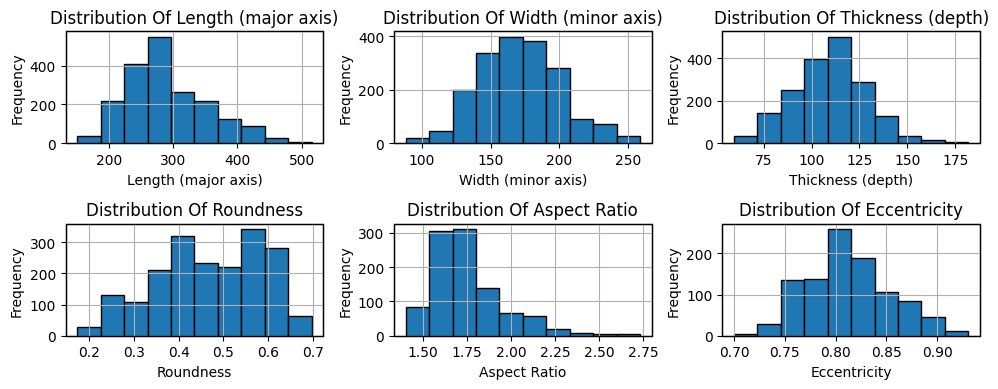

In [8]:
# View distributions for features
features = df.drop(columns=['Unnamed: 0', 'Type'])
features_without_missing_values = features.columns[features.isnull().sum() == 0]
features = features.drop(columns=features_without_missing_values)

# Number of features
num_features = len(features.columns)

# Determine grid size for subplots
n_rows = (num_features + 2) // 3

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(10, 4))
axes = axes.flatten()

# Plot each feature in a subplot
for i, col in enumerate(features.columns):
    axes[i].hist(features[col], edgecolor='black')
    initial_col = col

    axes[i].set_title(f'Distribution Of {col}')

    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid()
    axes[i].patch.set_edgecolor('black')
    axes[i].patch.set_linewidth(1)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [9]:
len(df['Width (minor axis)'].isnull())

2803

In [10]:
len(df['Length (major axis)'].isnull())

2803

In [11]:
len(df[df['Length (major axis)'].isnull() & df['Width (minor axis)'].isnull()])

0

In [12]:
len(df[df['Length (major axis)'].isnull() & df['Aspect Ratio'].isnull() & df['Eccentricity'].isnull()])

857

In [13]:
len(df[df['Width (minor axis)'].isnull() & df['Aspect Ratio'].isnull() & df['Eccentricity'].isnull()])

942

#### Analysis:

From the analysis above we can clearly see that both `Aspect ratio` and `Eccentricity` have missing values when either `Width (minor axis)` or `Length (major axis)` have missing values. Hence, we cannot make use of the formulas for `Aspect Ratio` or `Eccentricity` to find the actual values for those missing values.

Based on the distributions of the columns that contain missing values, most have a normal/near-normal distribution. We can therefore make use of mean imputation to handle missing values in those features. However, the distributions for `Length (major axis)` and `Aspect Ratio` are skewed to the right. Hence, we will make use of median imputation for those features.

## Handle missing values

Before the imputation we need to carefully consider that there might be occurrences where the imputed values for `Width (minor axis)` will be higher that the imputed value for `Length (major axis)`. This will result in trying to get the square root of a negative value when calculating the values for `Eccentricity`, based on its formula. Therefore, we will handle them using the current average of `Aspect Ratio` and the imputed values for `Length (major axis)`. Note this is only done to the records having a larger `Width (minor axis)` value than `Length (major axis value)`.

In [14]:
features_with_normal_distribution = ['Width (minor axis)', 'Thickness (depth)', 'Roundness'] # notice that 'Eccentricity' is not included
features_with_skewed_distribution = ['Length (major axis)'] # notice that 'Aspect Ratio' is not included
cleaned_df = df.copy()
average_aspect_ratio = df['Aspect Ratio'].mean()

# As mentioned, we will perform median imputation for features with a skewed distribution
for col in features_with_skewed_distribution:
  cleaned_df[col].fillna(cleaned_df[col].median(), inplace=True)

# As mentioned, we will perform mean imputation for features with a normal/near-normal distribution
for col in features_with_normal_distribution:
  if col == 'Width (minor axis)':
    cleaned_df[col].fillna(cleaned_df['Length (major axis)'] / average_aspect_ratio, inplace=True)
  else:
    cleaned_df[col].fillna(cleaned_df[col].mean(), inplace=True)


# Check if there are any missing values left
print(f'Missing values:\n{cleaned_df.isnull().sum()}\n')

Missing values:
Unnamed: 0                     0
Length (major axis)            0
Width (minor axis)             0
Thickness (depth)              0
Area                           0
Perimeter                      0
Roundness                      0
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64



Notice that we did not replace the missing values for `Eccentricity` or `Aspect Ratio`, even though we could have done the same as with the other features. The reason I choose not to replace them, is because these values are dependent on both `Length (major axis)` and `Width (minor axis)`. Therefore, we can make use of their respective formulas to calculate each missing value more accurate, instead of just using the mean or median imputations.

In [15]:
def calculate_eccentricity(df_row):
  if pd.isna(df_row['Width (minor axis)']):
      raise ValueError("Width (minor axis) cannot be NaN")

  if pd.isna(df_row['Length (major axis)']):
      raise ValueError("Length (major axis) cannot be NaN")

  return np.sqrt(1 - ((df_row['Width (minor axis)'] / df_row['Length (major axis)']) ** 2))

def calculate_aspect_ratio(df_row):
  if pd.isna(df_row['Width (minor axis)']):
      raise ValueError("Width (minor axis) cannot be NaN")

  if pd.isna(df_row['Length (major axis)']):
      raise ValueError("Length (major axis) cannot be NaN")

  return df_row['Width (minor axis)'] / df_row['Length (major axis)']

cleaned_df['Eccentricity'] = cleaned_df.apply(calculate_eccentricity, axis=1)
cleaned_df['Aspect Ratio'] = cleaned_df.apply(calculate_aspect_ratio, axis=1)

## Standardising the data

- **Robust scaling:** We use the RobustScaler to scale the numerical features. Since there seems to be some existens of outliers (after handling missing values), the outliers might introduce some bias to the classification model. Min-max scaling is also deemed to sensitive to outliers and may lose important information when scaling to a range of `[0,1]`. As for standard scaling, it is also sensitive to outliers and assumes the data has a normal distribution, which is not the case here. Hence, robust scaling is used.

In [16]:
# Using robust scaling for numerical features
scaler = RobustScaler()
scaled_features = scaler.fit_transform(cleaned_df.drop(columns=['Type']))
scaled_features = pd.DataFrame(scaled_features, columns=cleaned_df.columns[:-1])

## Encoding the data

- **One-hot encoding:** We choose to set the `sparse_output` flag to `True`. This helps to save computational cost and is thus more memory efficient.

In [17]:
# Using one-hot encoding to encode the class label
encoder = OneHotEncoder(sparse_output=True)
encoded_labels = encoder.fit_transform(cleaned_df[['Type']])
encoded_labels = encoded_labels.toarray()

## Shuffling and Splitting the data
Shuffling with Scikit-learn.

In [18]:
combined_cleaned_df = pd.concat([pd.DataFrame(scaled_features), pd.DataFrame(encoded_labels, columns=encoder.get_feature_names_out(['Type']))], axis=1)

# Combine the data
X = combined_cleaned_df.iloc[:, :-3]
y = combined_cleaned_df.iloc[:, -1]

# Shuffle
X, y = shuffle(X, y, random_state=99)

## Splitting the data

**Splitting Process:**

- **First Split:** Split the data into a Training Set (60%) and a Temporary Set (40%).

- **Second Split:** Separate the Temporary Set into a Validation Set (20% original data) and a Test Set (20% original data). This method ensures that the model's performance is evaluated without bias and not influenced by the data used for training or validation.

In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=99)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=99)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 1681 samples
Validation set: 561 samples
Test set: 561 samples
